In [27]:
#importing libraries

import re
import numpy as np
import contractions
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
file = open("C:/Users/user8/Downloads/MGP Resources/got1.txt", 'r')
text = file.read()
file.close()

print(text[:1000])

A Game Of Thrones 
Book One of A Song of Ice and Fire 
By George R. R. Martin 
PROLOGUE 
"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are 
dead." 
"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. 
Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. 
"Dead is dead," he said. "We have no business with the dead." 
"Are they dead?" Royce asked softly. "What proof have we?" 
"Will saw them," Gared said. "If he says they are dead, that's proof enough for me." 
Will had known they would drag him into the quarrel sooner or later. He wished it had been later rather 
than sooner. "My mother told me that dead men sing no songs," he put in. 
"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman's 
tit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit forest. 
Page 1

"We h

In [3]:
def clean_text(sample):
    
    sample = " ".join([x.lower() for x in sample.split()])
    sample = re.sub('\(', '', sample)
    sample = re.sub('\)', '', sample)
    sample = " ".join([contractions.fix(x) for x in sample.split()])  # fixes contractions like you're to you are
    sample = re.sub('[%s]' % re.escape(string.punctuation), ' ', sample) #punctuations
    sample = re.sub('[0-518]', '', sample) #delete all numbers till 518 because last mention is page 517
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = re.sub(' s ', ' ', sample) #replace s with space
    sample = re.sub(' t ', ' ', sample) #replace t with space
    sample = " ".join(x.strip() for x in sample.split()) #strips whitespace
    sample = sample.strip()
    sample = ' '.join([x.strip()  for x in sample.split()])
    
    return sample

In [4]:
clean_text = clean_text(text)

In [5]:
print(clean_text)

a game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint of a smile gared did not rise to the bait he was an old man past fifty and he had seen the lordlings come and go dead is dead he said we have no business with the dead are they dead royce asked softly what proof have we will saw them gared said if he says they are dead that is proof enough for me will had known they would drag him into the quarrel sooner or later he wished it had been later rather than sooner my mother told me that dead men sing no songs he put in my wet nurse said the same thing will royce replied never believe anything you hear at a woman tit there are things to be learned even from the dead his voice echoed too loud in the twilit forest page we have a long ride before us gared pointed out eight days maybe nine and night 

<BarContainer object of 2 artists>

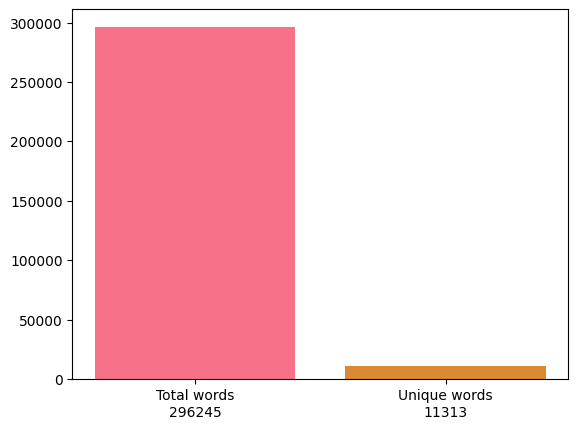

In [6]:
plt.bar(x = ["Total words\n"+str(len(clean_text.split())), "Unique words\n"+str(len(set(clean_text.split())))], 
        height=[len(clean_text.split()), len(set(clean_text.split()))], 
        color=sns.color_palette("husl", 10))

In [7]:
sequences_doc = []
seq_len = 30
l = seq_len + 1
tokens = [w for w in clean_text.split()]

for i in range(l, len(tokens)):
    
    seq = tokens[i-l:i]

    line = ' '.join(seq)
    sequences_doc.append(line)
    
print(sequences_doc[:15])

['a game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow', 'game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark', 'of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around', 'thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them', 'book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the', 'one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings', 'of a song of ice and fire by george r r martin prologue we should start back gared urged as the 

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences_doc)
sequences = tokenizer.texts_to_sequences(sequences_doc)

vocab_size = len(tokenizer.word_index) + 1

In [9]:
sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

seq_length = X.shape[1]

In [21]:
def define_model(vocab_size, seq_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 60, input_length=seq_length))
    model.add(LSTM(120, return_sequences=True))
    model.add(LSTM(120))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))
    
    #optimizer = Adam(0.0001)
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    return model

In [22]:
model = define_model(vocab_size, seq_length)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 60)            678840    
                                                                 
 lstm_6 (LSTM)               (None, 30, 120)           86880     
                                                                 
 lstm_7 (LSTM)               (None, 120)               115680    
                                                                 
 dense_6 (Dense)             (None, 100)               12100     
                                                                 
 dense_7 (Dense)             (None, 11314)             1142714   
                                                                 
Total params: 2,036,214
Trainable params: 2,036,214
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X, y, batch_size=128, epochs=15)

Epoch 1/15
2315/2315 [==============================] - 283s 122ms/step - loss: 6.2928 - accuracy: 0.0745
Epoch 2/15
2315/2315 [==============================] - 287s 124ms/step - loss: 5.7970 - accuracy: 0.1040
Epoch 3/15
2315/2315 [==============================] - 290s 125ms/step - loss: 5.5443 - accuracy: 0.1175
Epoch 4/15
2315/2315 [==============================] - 290s 125ms/step - loss: 5.3651 - accuracy: 0.1256
Epoch 5/15
2315/2315 [==============================] - 291s 126ms/step - loss: 5.2286 - accuracy: 0.1325
Epoch 6/15
2315/2315 [==============================] - 296s 128ms/step - loss: 5.1177 - accuracy: 0.1373
Epoch 7/15
2315/2315 [==============================] - 288s 124ms/step - loss: 5.0243 - accuracy: 0.1417
Epoch 8/15
2315/2315 [==============================] - 304s 131ms/step - loss: 4.9421 - accuracy: 0.1457
Epoch 9/15
2315/2315 [==============================] - 294s 127ms/step - loss: 4.8698 - accuracy: 0.1485
Epoch 10/15
2315/2315 [=======================

In [28]:
#saving the model and tokenizer as it takes a long time
model.save("C:/Users/user8/Downloads/MGP Resources/Project 11/models/text_gen_got_model.h5")
pickle.dump(tokenizer, open('C:/Users/user8/Downloads/MGP Resources/Project 11/data/tokenizer_text_gen.pkl', 'wb'))